## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Use .info() to get summary information for each data set
mouse_metadata.info()
study_results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [2]:
# Combine the data into a single dataset
data=pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
data.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice by grouping by Mouse ID and counting the number of rows
ID_group=data.groupby(["Mouse ID"])
mouse_count=len(ID_group)
print(f"Number of rows in Mouse ID column:{mouse_count}")


Number of rows in Mouse ID column:249


In [4]:
# Getting the duplicate mice by ID number
# Select duplicate rows based on Mouse ID and Timepoint using .duplicated()
# Since keep=False, all duplicates will be listed
# The df duplicate lists data for duplicates in both Mouse ID and Timepoint
duplicate = data[data.duplicated(subset=["Timepoint","Mouse ID"], keep=False)]

# The unique function is used to determine the duplicate Mouse ID
duplicate_ID = duplicate['Mouse ID'].unique()

# The nunique function counts the number of duplicates, i.e. number of duplicate unique Mouse IDs
number_of_duplicates = duplicate['Mouse ID'].nunique()

# The number of duplicates, duplicate Mouse ID, and the duplicate data frame are printed to determine what should be removed
print(f"There is {number_of_duplicates} duplicate(s) and the Mouse ID is {duplicate_ID}.The row(s) belonging to this Mouse ID are below.")
duplicate

There is 1 duplicate(s) and the Mouse ID is ['g989'].The row(s) belonging to this Mouse ID are below.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# data_clean is a new dataframe that contains all rows except those with the Mouse ID g989
data_clean = data[data['Mouse ID']!="g989"]


In [6]:
# Checking the number of mice in the clean DataFrame.
ID_group_clean = data_clean.groupby(["Mouse ID"])
mouse_count_clean = len(ID_group_clean)
print(f"Number of rows in Mouse ID column:{mouse_count_clean}")

Number of rows in Mouse ID column:248


## Summary Statistics

In [148]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the properties of each drug regimen: 
# group clean data set by drug regimen
data_clean_regimen = data_clean.groupby(["Drug Regimen"])

# define tumor_volume as the tumor_volume data column from the grouped dataframe
tumor_volume = data_clean_regimen['Tumor Volume (mm3)']

# calculate summary statistics
mean_tumor = tumor_volume.mean()
median_tumor = tumor_volume.median()
stdev_tumor = tumor_volume.std()
var_tumor = tumor_volume.var()
sem_tumor = tumor_volume.sem()

# concatanate summary statistics in a new dataframe and add new column titles as keys
data_summary = pd.concat([mean_tumor, median_tumor, stdev_tumor, var_tumor, sem_tumor], axis=1, keys = ['Mean Tumor Vol. (mm3)','Median Tumor Vol. (mm3)','Tumor Vol. St. Dev.','Tumor Vol. Var. (mm3)','Tumor Vol. SEM'])
data_summary



,Mean Tumor Vol. (mm3),Median Tumor Vol. (mm3),Tumor Vol. St. Dev.,Tumor Vol. Var. (mm3),Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [149]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary = data_clean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'std','var','sem']})
summary

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

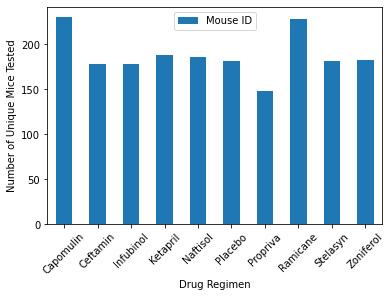

In [37]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# count the number of Mouse IDs for each drug
#should be value count on drug regiment 
mouse_count = pd.DataFrame(data_clean.groupby(['Drug Regimen'])['Mouse ID'].count())

# Chart our data, give it a title, and label the axes
mouse_chart = mouse_count.plot(kind="bar", rot=45)
mouse_chart.set_xlabel("Drug Regimen")
mouse_chart.set_ylabel("Number of Measurements")

plt.show()


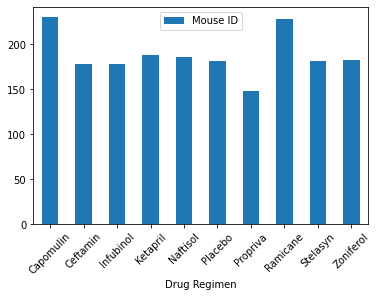

In [239]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Create new data frame counting the number of mice for each drug regimen using .count()
#mouse_count = pd.DataFrame(data_clean.groupby(['Drug Regimen'])['Mouse ID'].count())

# Chart our data using .plot and designating plot type, give it a title, and label the axes
#mouse_chart = mouse_count.plot(kind="bar", rot=45)
#mouse_chart.set_xlabel("Drug Regimen")
#mouse_chart.set_ylabel("Number of Measurements")
#df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
mouse_chart_2 = mouse_count.plot.bar(rot=45)
#plt.show()

#mouse_count

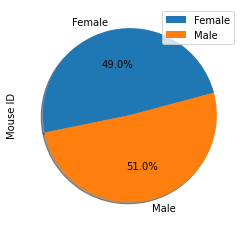

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count = pd.DataFrame(data_clean.groupby(['Sex'])['Mouse ID'].count())

gender_pie = gender_count.plot.pie(y='Mouse ID',autopct='%1.1f%%', shadow=True, startangle=15 )



KeyError: 'Sex'

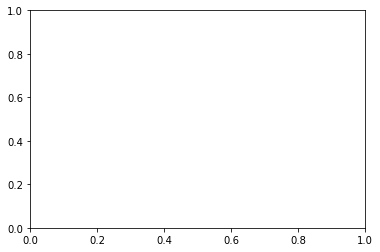

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = pd.DataFrame(data_clean.groupby(['Sex'])['Mouse ID'].count())


## Quartiles, Outliers and Boxplots

In [158]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# create a new dataframe that is grouped by Mouse ID and provides the maximum Timepoint for each Mouse ID
max_time = data_clean.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_time = max_time.merge(data_clean, left_on=(max_time['Mouse ID'], 'Timepoint'), right_on=(data_clean['Mouse ID'], 'Timepoint'), how='left')

# print out merged dataframe to check
merge_time

,key_0,Mouse ID_x,Timepoint,Mouse ID_y,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,a203,45,a203,67.973419,2,Infubinol,Female,20,23
1,a251,a251,45,a251,65.525743,1,Infubinol,Female,21,25
2,a262,a262,45,a262,70.717621,4,Placebo,Female,17,29
3,a275,a275,45,a275,62.999356,3,Ceftamin,Female,20,28
4,a366,a366,30,a366,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...,...,...
243,z435,z435,10,z435,48.710661,0,Propriva,Female,12,26
244,z578,z578,45,z578,30.638696,0,Ramicane,Male,11,16
245,z581,z581,45,z581,62.754451,3,Infubinol,Female,24,25
246,z795,z795,45,z795,65.741070,3,Naftisol,Female,13,29


In [220]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data 
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# use a for loop to get values for each drug of interest and append to list
for treatment in treatments:
    
    # create a subset data frame with tumor volume data from a particular drug regimen
    sub_df = merge_time.loc[merge_time['Drug Regimen'] == treatment, ['Tumor Volume (mm3)']]
    
    # calculate quartiles to get lower/upper quartiles, iqr, and lower/upper bounds
    quartiles = sub_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # append each list of calculations to the tumor_vol list
    tumor_vol.append({'Drug Regimen':treatment, 'Tumor Volume Lower Q (mm3)':lowerq, 'Tumor Volume Upper Q (mm3)':upperq, 'Tumor Volume IQR (mm3)':iqr, 'Tumor Volume Lower Bound (mm3)':lower_bound,'Tumor Volume Upper Bound (mm3)':upper_bound})

# make a dataframe from appended tumor volume list
iqr_df = pd.DataFrame(tumor_vol)
iqr_df          
    

,Drug Regimen,Tumor Volume Lower Q (mm3),Tumor Volume Upper Q (mm3),Tumor Volume IQR (mm3),Tumor Volume Lower Bound (mm3),Tumor Volume Upper Bound (mm3)
0,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015
1,Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811
2,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446
3,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458


In [ ]:
# Determine outliers
# temperatures.loc[(temperatures < lower_bound)| (temperatures > upper_bound)]

KeyError: "None of [Index(['Drug Regimen'], dtype='object')] are in the [columns]"

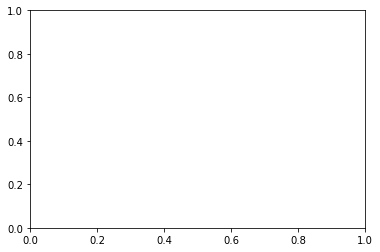

In [232]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#final_volume = merge_time[merge_time['Drug Regimen'].isin(treatments)].groupby('Tumor Volume (mm3)').boxplot()
iqr_df.boxplot(column='Drug Regimen')
#boxplot = final_volume.boxplot(column=treatments)
#final_volume

## Line and Scatter Plots

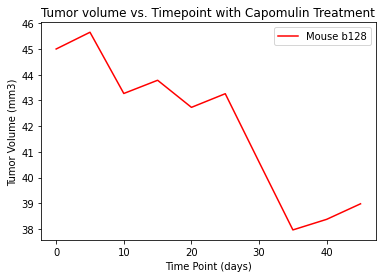

In [130]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# create subset dataframe with only Capomulin data and one mouse (choosing b128)
capomulin_b128 = data_clean[(data_clean['Drug Regimen']=='Capomulin') & (data_clean['Mouse ID']=='b128')]
#capomulin_b128
x_values = capomulin_b128['Timepoint']
y_values = capomulin_b128['Tumor Volume (mm3)']

plt.plot(x_values, y_values, color="red", label="Mouse b128")

#Add labels to X and Y axes :: Add title
plt.title("Tumor Volume vs. Timepoint with Capomulin Treatment")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")

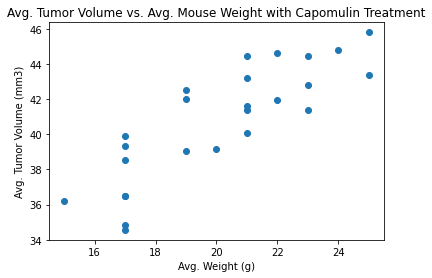

In [135]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# df with only Capomul data
capomulin = data_clean[(data_clean['Drug Regimen']=='Capomulin')]

# grouby Mouse ID and calculate averages for all column values using .mean()
capomulin_group_avg =  capomulin.groupby(['Mouse ID']).mean()

# Plot avg tumor volume vs. mouse weight
# define x and y values from capomulin avg
x_values_c = capomulin_group_avg['Weight (g)']
y_values_c = capomulin_group_avg['Tumor Volume (mm3)']

# Use plt.scatter and other parameters to create the plot
plt.scatter(x_values_c,y_values_c)
plt.title("Avg. Tumor Volume vs. Avg. Mouse Weight with Capomulin Treatment")
plt.xlabel('Avg. Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

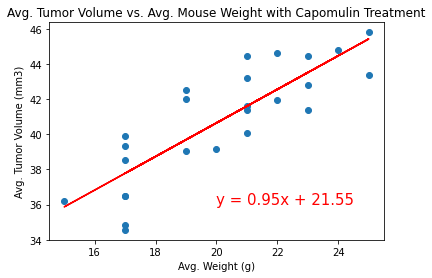

In [145]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# define x and y data from capomulin average dataframe (were also in previous cell)
x_values_c = capomulin_group_avg['Weight (g)']
y_values_c = capomulin_group_avg['Tumor Volume (mm3)']

#import lineregress from scipy.stats
from scipy.stats import linregress

#define values using lineregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_c, y_values_c)
regress_values = x_values_c * slope + intercept

#define line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot data, line, and equation of the line (using plt.annotate)
plt.scatter(x_values_c,y_values_c)
plt.plot(x_values_c,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Avg. Tumor Volume vs. Avg. Mouse Weight with Capomulin Treatment")
plt.xlabel('Avg. Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.show()